# Première analyse du jeu de données

## Importaiton des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from connexion import *

## Création du MCD à l'aide de MOCODO

In [2]:
nom_bdd = "vente_jeux" # nom de la base de donnée

In [3]:
%reload_ext mocodo_magic

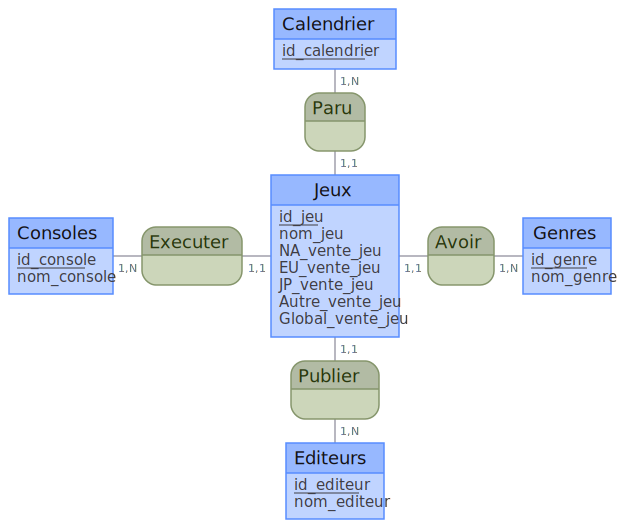

In [4]:
%%mocodo --mld --colors ocean --shapes copperplate --title=vente_jeux --relations=mysql
:
:
Calendrier: id_calendrier [DATE NOT NULL]
:
:

::
Paru, 1N Calendrier, 11 Jeux
::

Consoles : id_console [INT NOT NULL], nom_console [VARCHAR(100) NOT NULL]
Executer, 1N Consoles, 11 Jeux
Jeux : id_jeu [INT NOT NULL], nom_jeu [VARCHAR(200) NOT NULL], NA_vente_jeu [FLOAT], EU_vente_jeu [FLOAT], JP_vente_jeu [FLOAT], Autre_vente_jeu [FLOAT], Global_vente_jeu [FLOAT]
Avoir, 11 Jeux, 1N Genres
Genres: id_genre [INT NOT NULL], nom_genre [VARCHAR(100)]

::
Publier, 11 Jeux, 1N Editeurs
::

::
Editeurs : id_editeur [INT], nom_editeur [VARCHAR(100)]
::

In [5]:
%load mocodo_notebook/sandbox_mysql.sql

Mocodo as permis de générer le code SQL pour la création de la base proposé et l'a stocké dans un fichier au format "*.sql*". Cependant on remarque que certaines commande sont commentées. Il a donc été nécéssaire de retravailler le fichier manuellement pour permettre la création de la table __*calendrier*__ qui ne possède uniquement une colonne id. Les commandes de création de clefs étrangères ont quant-à elles commenter pour éviter tout problème lors du chargment des données. 

## Création de la base de donnée

In [5]:
fichier_creation = "./mocodo_notebook/sandbox_mysql.sql"

In [7]:
Connexion.drop_db()

In [8]:
Connexion.creation(nom_bdd, fichier_creation) # Connexion à MySQL
Connexion.fermer() # Fermeture de la connexion

## Chargement des données

In [8]:
data = pd.read_csv("./vgsales.csv")
data.head() # affichages des 5 premières observation des datas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
data.info() # information générale du DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
data.dropna(inplace=True) # Suppression des lignes contenant des valeurs manquantes
data.reset_index(drop=True, inplace=True)

In [11]:
data["Year"] = data["Year"].astype("int") #pd.Int32Dtype()) # conversion dtype colonne float64 en int32 (Int32Dtype prend en charge les NaN)

In [12]:
print(data.info())
print("===================")
print(data["Year"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB
None
0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16286    2002
16287    2003
16288    2008
16289    2010
16290    2003
Name: Year, Length: 16291, dtype: int32


## Extraction des années et formatage (AAAA-MM-DD)

In [13]:
year = data["Year"].unique()

In [14]:
year = np.sort(year[~np.isnan(year)])
# year = np.datetime64(year.astype("str"))
print(year)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2020]


In [15]:
# np.savetxt('annees.csv', year, delimiter=",")

In [16]:
# year = pd.DataFrame(year.astype("str"), columns = ["year"])
# year.to_csv("annees.csv", index=False, header=False)

## Création du fichier csv pour la bdd

In [17]:
calendar = pd.DataFrame(year.copy().astype("str"), columns=["year"])

In [18]:
calendar["month"] = "01"
calendar["day"] = "01"

In [19]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    39 non-null     object
 1   month   39 non-null     object
 2   day     39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [20]:
annees = pd.to_datetime(calendar).astype("str").rename("id_calendrier")

In [21]:
annees.to_csv("./CSV_2DB/annees.csv", index=False, header=True)

In [22]:
jeux = data.copy()

# year = np.sort(year[~np.isnan(year)])
year_kv = dict((k, v) for v, k in zip(annees, year))
# year_kv_formated = dict((k, v) for v, k in enumerate(annees, 1))
year_kv

{1980: '1980-01-01',
 1981: '1981-01-01',
 1982: '1982-01-01',
 1983: '1983-01-01',
 1984: '1984-01-01',
 1985: '1985-01-01',
 1986: '1986-01-01',
 1987: '1987-01-01',
 1988: '1988-01-01',
 1989: '1989-01-01',
 1990: '1990-01-01',
 1991: '1991-01-01',
 1992: '1992-01-01',
 1993: '1993-01-01',
 1994: '1994-01-01',
 1995: '1995-01-01',
 1996: '1996-01-01',
 1997: '1997-01-01',
 1998: '1998-01-01',
 1999: '1999-01-01',
 2000: '2000-01-01',
 2001: '2001-01-01',
 2002: '2002-01-01',
 2003: '2003-01-01',
 2004: '2004-01-01',
 2005: '2005-01-01',
 2006: '2006-01-01',
 2007: '2007-01-01',
 2008: '2008-01-01',
 2009: '2009-01-01',
 2010: '2010-01-01',
 2011: '2011-01-01',
 2012: '2012-01-01',
 2013: '2013-01-01',
 2014: '2014-01-01',
 2015: '2015-01-01',
 2016: '2016-01-01',
 2017: '2017-01-01',
 2020: '2020-01-01'}

In [23]:
jeux["Year"] = jeux["Year"].replace(year_kv)
# jeux["Year"] = jeux["Year"].replace(year_kv_formated)

In [24]:
# jeux.Year[jeux.Year.isnull()] = "NULL"

In [25]:
# jeux.Year = jeux.Year.fillna("NULL", inplace=True)

In [26]:
jeux.Year

0        2006-01-01
1        1985-01-01
2        2008-01-01
3        2009-01-01
4        1996-01-01
            ...    
16286    2002-01-01
16287    2003-01-01
16288    2008-01-01
16289    2010-01-01
16290    2003-01-01
Name: Year, Length: 16291, dtype: object

In [27]:
jeux

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [28]:
# LOAD DATA LOCAL INFILE './annees.csv' 
# INTO TABLE calendrier
# FIELDS TERMINATED BY ','
# ENCLOSED BY '"'
# LINES TERMINATED BY '\n'
# IGNORE 1 ROWS;

## Extraction "Plateform" vers un CSV

In [29]:
console = data["Platform"].unique() # Extraction des valeurs console unique
console = np.sort(console) # Trie des valeurs
console

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [30]:
console_kv = dict((k, v) for v, k in enumerate(console, 1)) # mise des données sous forme de dictionnaire
print(console_kv)

{'2600': 1, '3DO': 2, '3DS': 3, 'DC': 4, 'DS': 5, 'GB': 6, 'GBA': 7, 'GC': 8, 'GEN': 9, 'GG': 10, 'N64': 11, 'NES': 12, 'NG': 13, 'PC': 14, 'PCFX': 15, 'PS': 16, 'PS2': 17, 'PS3': 18, 'PS4': 19, 'PSP': 20, 'PSV': 21, 'SAT': 22, 'SCD': 23, 'SNES': 24, 'TG16': 25, 'WS': 26, 'Wii': 27, 'WiiU': 28, 'X360': 29, 'XB': 30, 'XOne': 31}


In [31]:
jeux["Platform"] = jeux["Platform"].replace(console_kv)

In [32]:
console = pd.Series(console, name="nom_console")
console.index += 1
console.to_csv("./CSV_2DB/consoles.csv", index=True, header=True)

## Extraction "Genre" vers un CSV

In [33]:
genre = data["Genre"].unique() # Extraction des valeurs console unique
genre = np.sort(genre) # Trie des valeurs
genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [34]:
genre_kv = dict((k, v) for v, k in enumerate(genre, 1)) # mise des données sous forme de dictionnaire
print(genre_kv)

{'Action': 1, 'Adventure': 2, 'Fighting': 3, 'Misc': 4, 'Platform': 5, 'Puzzle': 6, 'Racing': 7, 'Role-Playing': 8, 'Shooter': 9, 'Simulation': 10, 'Sports': 11, 'Strategy': 12}


In [35]:
jeux["Genre"] = jeux["Genre"].replace(genre_kv)

In [36]:
genre = pd.Series(genre, name="nom_genre")
genre.index += 1
genre.to_csv("./CSV_2DB/genres.csv", index=True, header=True)

## Extraction "Publisher" vers un CSV

In [37]:
editeur = data["Publisher"].unique() # Extraction des valeurs console unique
editeur = [x for x in editeur if str(x) != 'nan']
editeur = np.sort(editeur) # Trie des valeurs

In [38]:
editeur = pd.Series(editeur, name="nom_editeur")
editeur.index += 1
editeur.to_csv("./CSV_2DB/editeurs.csv", index=True, header=True)

In [39]:
editeur_kv = dict((k, v) for v, k in enumerate(editeur, 1)) # mise des données sous forme de dictionnaire

In [40]:
# jeux.Publisher[jeux.Publisher.isnull()] ="NULL"

In [41]:
jeux["Publisher"] = jeux["Publisher"].replace(editeur_kv).astype("str")
# jeux["Publisher"] = jeux["Publisher"].replace(editeur_kv).astype(pd.Int32Dtype())

In [42]:
jeux = jeux.drop(columns=["Rank"])

In [43]:
jeux = jeux[["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Year", "Platform", "Genre", "Publisher"]]
jeux = jeux.rename(columns={"Name" : "nom_jeu", "NA_Sales" : "na_vente_jeu", "EU_Sales" : "eu_vente_jeu", "JP_Sales" : "jp_vente_jeu", "Other_Sales" : "autre_vente_jeu", "Global_Sales" : "global_vente_jeu", "Year" : "id_calendrier", "Platform" : "id_console", "Genre" : "id_genre", "Publisher" : "id_editeur"})

In [44]:
jeux.index += 1
jeux.to_csv("./CSV_2DB/jeux.csv", index=True, header=True)

In [45]:
editeur.index

RangeIndex(start=1, stop=577, step=1)

In [46]:
jeux["id_editeur"].astype("int").sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [47]:
editeur.index

RangeIndex(start=1, stop=577, step=1)

In [48]:
editeur[577]

KeyError: 577